Exploratory Data Analysis

understanding the dataset to explore how the data in the database and if there is need of creating some aggregated table that can helo with :
 - Vendor Selection for profitblity 
- Product Pricing Optitmization 

In [8]:
# Use this to follow the video exactly
import pandas as pd
import sqlite3

# This connects to the database file you already made
conn = sqlite3.connect('inventory.db')

# This query is specific to SQLite and will list your tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)

print(tables)

              name
0  begin_inventory
1    end_inventory
2  purchase_prices
3        purchases
4            sales
5   vendor_invoice


In [9]:
for table in tables['name']:
    # Get the count of records from the table
    count = pd.read_sql(f"SELECT count(*) as count FROM {table}", conn)['count'].values[0] # Corrected 'form' to 'FROM'
    
    # Print the result in a formatted way
    print(f"Count of records: {count:<10} {table}")
    display(pd.read_sql(f"select * from {table} limit 5", conn))

Count of records: 206529     begin_inventory


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


Count of records: 224489     end_inventory


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


Count of records: 12261      purchase_prices


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


Count of records: 2372474    purchases


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


Count of records: 12825363   sales


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


Count of records: 5543       vendor_invoice


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


In [9]:
# The table is 'purchase_prices' (plural), not 'purchase_price'
purchase_prices = pd.read_sql_query("SELECT * FROM purchase_prices WHERE VendorNumber = '4446'", conn)

purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName


In [11]:
sales = pd.read_sql_query("select * from sales where vendorNo = 4466""",conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,9_BLACKPOOL_5215,9,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-12-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9449,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9450,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9451,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


In [16]:
# Get a list of all unique vendor numbers from the sales table
available_vendors = pd.read_sql_query("SELECT DISTINCT VendorNo FROM sales", conn)

print("Available Vendor Numbers in 'sales' table:")
print(available_vendors)

Available Vendor Numbers in 'sales' table:
     VendorNo
0       12546
1        2000
2       10754
3        8352
4       17035
..        ...
122     99166
123      3551
124     90059
125      5083
126      9099

[127 rows x 1 columns]


In [18]:
# First, load the 'purchases' table from the database into a DataFrame
purchases = pd.read_sql_query("SELECT * FROM purchases", conn)

# Now, your original groupby command will work
purchases.groupby(['Brand', 'PurchasePrice'])[['Quantity', 'Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
58,9.28,3550,32944.00
60,7.40,1633,12084.20
61,10.60,312,3307.20
62,28.67,3200,91744.00
63,30.46,2855,86963.30
...,...,...,...
90089,77.92,32,2493.44
90090,448.27,6,2689.62
90604,78.42,118,9253.56


In [26]:
# Use 'VendorNo' which is the correct column name
vendor_invoice.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [27]:
purcha

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372469,49_GARIGILL_22298,49,22298,Zorvino Vyds Sangiovese,750mL,90058,ZORVINO VINEYARDS,13593,2024-12-19,2024-12-28,2025-01-09,2025-02-06,8.06,12,96.72,2
2372470,1_HARDERSFIELD_19556,1,19556,Zorvino Bacca Z Blackberry,750mL,90058,ZORVINO VINEYARDS,13593,2024-12-19,2024-12-27,2025-01-09,2025-02-06,9.39,12,112.68,2
2372471,66_EANVERNESS_22297,66,22297,Zorvino Vyds Pearz,750mL,90058,ZORVINO VINEYARDS,13593,2024-12-19,2024-12-26,2025-01-09,2025-02-06,6.75,12,81.00,2
2372472,69_MOUNTMEND_19557,69,19557,Zorvino Fragole Z Strawberry,750mL,90058,ZORVINO VINEYARDS,13593,2024-12-19,2024-12-26,2025-01-09,2025-02-06,9.39,12,112.68,2


In [30]:
# This will now work correctly
sales.groupby('Brand')[['SalesDollars', 'SalesPrice', 'SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
3140,50531.10,30071.85,3890
5215,60416.49,41542.02,4651
5255,79187.04,51180.60,6096


* The **purchase table** contains actual purchase data, including the date of purchase, products (brands) purchased by vendors, the amount paid (in dollars), and the quantity purchased.

* The **purchase price table**, derived from the `purchase_prices` table, provides product-level actual and purchase prices. The combination of vendor and the brand is critical in this table.

* The **vendor invoice table** aggregates data from the purchase table, summarizing quantity and dollar amounts, along with an additional column for freight. This table maintains uniqueness based on vendor and PO number.

* The **sale table** captures actual sales transactions, detailing the brands purchased by vendors, the quantity sold, the selling price, and the revenue earned.

As the data that we need for analysis is distributed in different tables, we need to create a summary table containing:
* purchase transactions made by vendors
* sales transaction data
* freight costs from the vendor
* relevant product prices from vendors

In [7]:
# First, ensure the vendor_invoice DataFrame is loaded from the database
vendor_invoice = pd.read_sql_query("SELECT * FROM vendor_invoice", conn)

# Now run the corrected query
freight_summary = pd.read_sql_query("""
    SELECT 
        VendorNumber, 
        SUM(Freight) as FreightCost 
    FROM 
        vendor_invoice 
    GROUP BY 
        VendorNumber
""", conn)

freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [6]:
# Add these lines to the top of your notebook and run the cell
import pandas as pd
import sqlite3

# This creates the connection to your database file
conn = sqlite3.connect('inventory.db')

# --- Now your query will work ---
final_df = pd.read_sql_query("""
    SELECT
        p.VendorNumber,
        vi.VendorName, 
        p.Brand,
        p.PurchasePrice,
        pp.Volume,
        pp.Price as ActualPrice,
        SUM(p.Quantity) as TotalPurchaseQuantity,
        SUM(p.Dollars) as TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_prices pp
        ON p.Brand = pp.Brand AND p.VendorNumber = pp.VendorNumber
    JOIN vendor_invoice vi
        ON p.VendorNumber = vi.VendorNumber
    WHERE p.PurchasePrice > 0
    GROUP BY 
        p.VendorNumber, 
        vi.VendorName, 
        p.Brand
    ORDER BY 
        TotalPurchaseDollars DESC
""", conn)

final_df

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,1128,BROWN-FORMAN CORP,1233,26.27,1750,36.99,7979400,2.096188e+08
1,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,9022090,2.092223e+08
2,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,10307385,1.880067e+08
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,11092510,1.793659e+08
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,7595995,1.662763e+08
...,...,...,...,...,...,...,...,...
12437,1439,CAPSTONE INTERNATIONAL,2213,13.66,1750,26.99,4,5.464000e+01
12438,5612,MILTONS DISTRIBUTING CO,17444,5.22,750,7.99,10,5.220000e+01
12439,5612,MILTONS DISTRIBUTING CO,17675,4.14,750,6.29,10,4.140000e+01
12440,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,55,3.905000e+01


In [ ]:
sales.columns

In [10]:
pd.read_sql_query("""
    SELECT
        VendorNo,
        Brand,
        SUM(SalesDollars) as TotalSalesDollars,
        SUM(SalesPrice) as TotalSalesPrice,
        SUM(SalesQuantity) as TotalSalesQuantity,
        SUM(ExciseTax) as TotalExciseTax
    FROM sales
    GROUP BY VendorNo, Brand
    ORDER BY TotalSalesDollars
""", conn)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax
0,8004,5287,0.98,0.98,2,0.10
1,9206,2773,0.99,0.99,1,0.05
2,3252,3933,1.98,0.99,2,0.10
3,3924,9123,1.98,0.99,2,0.10
4,10050,3623,1.98,1.98,2,0.10
...,...,...,...,...,...,...
11267,3960,3545,4223107.62,545778.28,135838,249587.83
11268,3960,4261,4475972.88,420050.01,200412,368242.80
11269,17035,8068,4538120.60,461140.15,187140,343854.07
11270,4425,3405,4819073.49,561512.37,160247,294438.66


In [11]:
import pandas as pd
import sqlite3

# This creates the connection to your database file
conn = sqlite3.connect('inventory.db')

In [13]:
vendor_sales_summary = pd.read_sql_query("""
    WITH FreightSummary AS (
        SELECT
            VendorNumber,
            SUM(Freight) AS FreightCost
        FROM vendor_invoice
        GROUP BY VendorNumber
    ),
    
    PurchaseSummary AS (
        SELECT
            p.VendorNumber,
            p.VendorName,
            p.Brand,
            p.Description,
            p.PurchasePrice,
            pp.Price AS ActualPrice,
            pp.Volume,
            SUM(p.Quantity) AS TotalPurchaseQuantity,
            SUM(p.Dollars) AS TotalPurchaseDollars
        FROM purchases p
        JOIN purchase_prices pp
            ON p.Brand = pp.Brand AND p.VendorNumber = pp.VendorNumber
        WHERE p.PurchasePrice > 0
        GROUP BY
            p.VendorNumber,
            p.VendorName,
            p.Brand,
            p.Description,
            p.PurchasePrice,
            pp.Price,
            pp.Volume
    ),

    SalesSummary AS (
        SELECT
            VendorNo,
            Brand,
            SUM(SalesQuantity) AS TotalSalesQuantity,
            SUM(SalesDollars) AS TotalSalesDollars,
            SUM(SalesPrice) AS TotalSalesPrice,
            SUM(ExciseTax) AS TotalExciseTax
        FROM sales
        GROUP BY VendorNo, Brand
    )

    SELECT
        ps.VendorNumber,
        ps.VendorName,
        ps.Brand,
        ps.Description,
        ps.PurchasePrice,
        ps.ActualPrice,
        ps.Volume,
        ps.TotalPurchaseQuantity,
        ps.TotalPurchaseDollars,
        ss.TotalSalesQuantity,
        ss.TotalSalesDollars,
        ss.TotalSalesPrice,
        ss.TotalExciseTax,
        fs.FreightCost
    FROM PurchaseSummary ps
    LEFT JOIN SalesSummary ss
        ON ps.VendorNumber = ss.VendorNo
        AND ps.Brand = ss.Brand
    LEFT JOIN FreightSummary fs
        ON ps.VendorNumber = fs.VendorNumber
    ORDER BY ps.TotalPurchaseDollars DESC
""", conn)

In [14]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5.0,15.95,10.96,0.55,27100.41
10644,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134.0,65.66,1.47,7.04,50293.62
10645,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,2.0,1.98,0.99,0.10,14069.87
10646,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,72.0,143.28,77.61,15.12,257032.07


In [15]:
# This is a better way to check the result without printing thousands of rows
vendor_sales_summary.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07


This query generates a vendor-wise sales and purchase summary, which is valuable for:

**Performance Optimization**

* The query involves heavy joins and aggregations on large datasets like sales and purchases.
* Storing the pre-aggregated results avoids repeated expensive computations.
* Helps in analyzing sales, purchases, and pricing for different vendors and brands.
* Future Benefits of Storing this data for faster Dashboarding & Reporting.
* Instead of running expensive queries each time, dashboards can fetch data quickly from vendor_sales_summary.

In [24]:
vendor_sales_summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                   float64
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
dtype: object

In [23]:
vendor_sales_summary.isnull().sum()

VendorNumber             0
VendorName               0
Brand                    0
Description              0
PurchasePrice            0
ActualPrice              0
Volume                   0
TotalPurchaseQuantity    0
TotalPurchaseDollars     0
TotalSalesQuantity       0
TotalSalesDollars        0
TotalSalesPrice          0
TotalExciseTax           0
FreightCost              0
dtype: int64

In [22]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP', 'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA',
       'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'STOLI GROUP,(USA) LLC',
       'PROXIMO SPIRITS INC.', 'MOET HENNESSY USA INC', 'CAMPARI AMERICA',
       'SAZERAC CO INC', 'CONSTELLATION BRANDS INC', 'M S WALKER INC',
       'SAZERAC NORTH AMERICA INC.', 'PALM BAY INTERNATIONAL INC',
       'REMY COINTREAU USA INC', 'SIDNEY FRANK IMPORTING CO',
       'E & J GALLO WINERY', 'WILLIAM GRANT & SONS INC',
       'HEAVEN HILL DISTILLERIES', 'DISARONNO INTERNATIONAL LLC',
       'EDRINGTON AMERICAS', 'CASTLE BRANDS CORP.',
       'SOUTHERN WINE & SPIRITS NE', 'STE MICHELLE WINE ESTATES',
       'TRINCHERO FAMILY ESTATES', 'MHW LTD', 'WINE GROUP INC',
       'PERFECTA WINES', 'LUXCO INC', 'TREASURY WINE ESTATES',
       'DIAGEO CHATEAU ESTATE WINES', 'SHAW ROSS INT L IMP LTD',
       'PINE STATE TRADING CO', 'PHILLIPS PRO

In [21]:
# Convert the 'Volume' column to a floating-point number type
vendor_sales_summary['Volume'] = vendor_sales_summary['Volume'].astype('float64')

# Fill any missing values (NaN) in the entire DataFrame with 0
vendor_sales_summary.fillna(0, inplace = True)

# Remove any leading or trailing whitespace from the 'VendorName' column
vendor_sales_summary['VendorName'] = vendor_sales_summary['VendorName'].str.strip()

In [26]:
# Corrected column names: 'TotalSalesDollars' and 'TotalPurchaseDollars'
vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']

# Display the first few rows to check the new GrossProfit column
vendor_sales_summary.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61


In [27]:
# Calculate Profit Margin as a percentage
vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars']) * 100

# Calculate Stock Turnover ratio
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity'] / vendor_sales_summary['TotalPurchaseQuantity']

# Calculate the ratio of sales to purchases
vendor_sales_summary['SalestoPurchaseRatio'] = vendor_sales_summary['TotalSalesDollars'] / vendor_sales_summary['TotalPurchaseDollars']

In [28]:
cursor = conn.cursor()

In [29]:
# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# SQL command to create the new table
cursor.execute("""
    CREATE TABLE vendor_sales_summary (
        VendorNumber INT,
        VendorName VARCHAR(100),
        Brand INT,
        Description VARCHAR(100),
        PurchasePrice DECIMAL(10,2),
        ActualPrice DECIMAL(10,2),
        Volume DECIMAL(10,2),
        TotalPurchaseQuantity INT,
        TotalPurchaseDollars DECIMAL(15,2),
        TotalSalesQuantity INT,
        TotalSalesDollars DECIMAL(15,2),
        TotalSalesPrice DECIMAL(15,2),
        TotalExciseTax DECIMAL(15,2),
        FreightCost DECIMAL(15,2),
        GrossProfit DECIMAL(15,2),
        ProfitMargin DECIMAL(15,2),
        StockTurnover DECIMAL(15,2),
        SalesToPurchaseRatio DECIMAL(15,2),
        PRIMARY KEY (VendorNumber, Brand)
    )
""")

In [32]:
# Corrected the table name from 'salas' to 'sales'
pd.read_sql_query("select * from vendor_sales_summary", conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio


In [33]:
# This command writes your DataFrame to the SQL table
vendor_sales_summary.to_sql('vendor_sales_summary', conn, if_exists = 'replace', index = False)

10648

In [34]:
import sqlite3
import pandas as pd
import logging
# Note: This next line assumes you have the 'ingestion_db.py' file from the first part of the project
# in the same directory, which contains the ingest_db function.
from ingestion_db import ingest_db 

# --- Setup Logging ---
logging.basicConfig(
    filename="logs/get_vendor_summary.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

def create_vendor_summary(conn):
    """
    This function will merge the different tables to get the overall vendor summary.
    """
    logging.info("Starting vendor summary creation.")
    
    vendor_sales_summary = pd.read_sql_query("""
        WITH FreightSummary AS (
            SELECT
                VendorNumber,
                SUM(Freight) AS FreightCost
            FROM vendor_invoice
            GROUP BY VendorNumber
        ),
        PurchaseSummary AS (
            SELECT
                p.VendorNumber,
                vi.VendorName,
                p.Brand,
                p.Description,
                p.PurchasePrice,
                pp.Price AS ActualPrice,
                pp.Volume,
                SUM(p.Quantity) AS TotalPurchaseQuantity,
                SUM(p.Dollars) AS TotalPurchaseDollars
            FROM purchases p
            JOIN purchase_prices pp
                ON p.Brand = pp.Brand AND p.VendorNumber = pp.VendorNumber
            JOIN vendor_invoice vi
                ON p.VendorNumber = vi.VendorNumber
            WHERE p.PurchasePrice > 0
            GROUP BY
                p.VendorNumber, vi.VendorName, p.Brand, p.Description, 
                p.PurchasePrice, pp.Price, pp.Volume
        ),
        SalesSummary AS (
            SELECT
                VendorNo,
                Brand,
                SUM(SalesQuantity) AS TotalSalesQuantity,
                SUM(SalesDollars) AS TotalSalesDollars,
                SUM(SalesPrice) AS TotalSalesPrice,
                SUM(ExciseTax) AS TotalExciseTax
            FROM sales
            GROUP BY VendorNo, Brand
        )
        SELECT
            ps.VendorNumber, ps.VendorName, ps.Brand, ps.Description,
            ps.PurchasePrice, ps.ActualPrice, ps.Volume,
            ps.TotalPurchaseQuantity, ps.TotalPurchaseDollars,
            ss.TotalSalesQuantity, ss.TotalSalesDollars,
            ss.TotalSalesPrice, ss.TotalExciseTax, fs.FreightCost
        FROM PurchaseSummary ps
        LEFT JOIN SalesSummary ss
            ON ps.VendorNumber = ss.VendorNo AND ps.Brand = ss.Brand
        LEFT JOIN FreightSummary fs
            ON ps.VendorNumber = fs.VendorNumber
        ORDER BY ps.TotalPurchaseDollars DESC
    """, conn)
    
    logging.info("Vendor summary creation complete.")
    return vendor_sales_summary

def clean_data(df):
    """
    This function will clean the data.
    """
    # Change datatype to float
    df['Volume'] = df['Volume'].astype('float')
    
    # Fill missing values with 0
    df.fillna(0, inplace = True)
    
    # Remove leading/trailing spaces from categorical columns
    df['VendorName'] = df['VendorName'].str.strip()
    df['Description'] = df['Description'].str.strip()
    
    # Create new columns for better analysis
    df['GrossProfit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
    df['ProfitMargin'] = (df['GrossProfit'] / df['TotalSalesDollars']) * 100
    df['StockTurnover'] = df['TotalSalesQuantity'] / df['TotalPurchaseQuantity']
    df['SalestoPurchaseRatio'] = df['TotalSalesDollars'] / df['TotalPurchaseDollars']
    
    return df

# --- Main execution block ---
if __name__ == '__main__':
    # Create database connection
    conn = sqlite3.connect('inventory.db')
    
    logging.info("Creating Vendor Summary Table.....")
    summary_df = create_vendor_summary(conn)
    logging.info(summary_df.head())
    
    logging.info("Cleaning Data.....")
    clean_df = clean_data(summary_df)
    logging.info(clean_df.head())
    
    logging.info("Ingesting Data.....")
    # Ingest the final, cleaned DataFrame into a new table
    ingest_db(clean_df, 'vendor_sales_summary', conn)
    
    logging.info('Completed')
    
    # Close the database connection
    conn.close()

Script finished! Your database 'inventory.db' is ready.


In [38]:
import pandas as pd
import sqlite3

# Create the database connection
conn = sqlite3.connect('inventory.db')

# Load the summary table into a DataFrame
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)



In [39]:
# This cell will now work correctly
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [41]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

C:\Users\parsh\AppData\Local\Temp\ipykernel_12368\3429271142.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="viridis")
C:\Users\parsh\AppData\Local\Temp\ipykernel_12368\3429271142.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="flare")


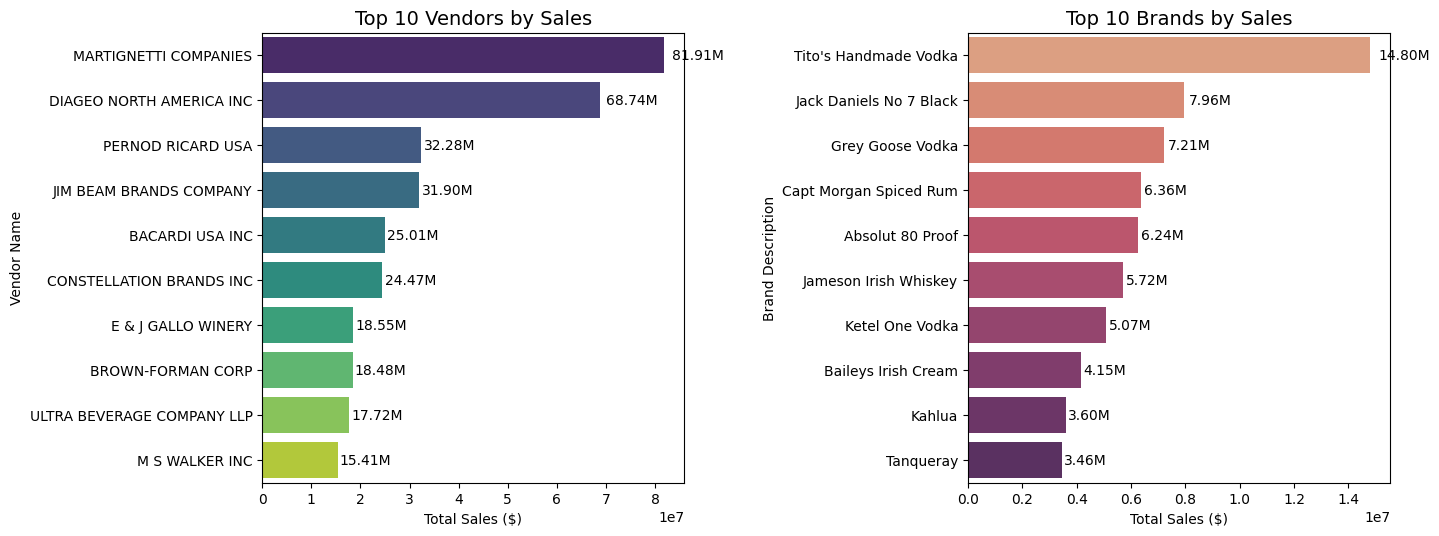

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure to hold the two plots
plt.figure(figsize=(15, 6))

# --- Plot for Top Vendors ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="viridis")
plt.title("Top 10 Vendors by Sales", fontsize=14)
plt.xlabel("Total Sales ($)")
plt.ylabel("Vendor Name")
# Add text labels to each bar
for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()), # This uses the format_dollars function
             ha='left', va='center', fontsize=10, color='black')

# --- Plot for Top Brands ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="flare")
plt.title("Top 10 Brands by Sales", fontsize=14)
plt.xlabel("Total Sales ($)")
plt.ylabel("Brand Description")
# Add text labels to each bar
for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()), # This uses the format_dollars function
             ha='left', va='center', fontsize=10, color='black')

# Adjust layout and display the plots
plt.tight_layout(pad=3.0)
plt.show()

**Which Vendor contribute the most to total purchase dollars?**

In [55]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(127, 4)

In [49]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()

# Display the result to check
vendor_performance.head()

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,PurchaseContribution%
0,AAPER ALCOHOL & CHEMICAL CO,105.07,-105.07,0.00,5.701930e-09,5.701930e-09
1,ADAMBA IMPORTS INTL INC,2686958.75,-2619382.53,67576.22,1.458157e-04,1.458157e-04
2,ALISA CARR BEVERAGES,664081.92,-550491.74,113590.18,3.603834e-05,3.603834e-05
3,ALTAMAR BRANDS LLC,468248.00,-452541.19,15706.81,2.541084e-05,2.541084e-05
4,AMERICAN SPIRITS EXCHANGE,7230.96,-5510.99,1719.97,3.924092e-07,3.924092e-07


In [53]:
# Use the correct variable name 'vendor_performance'
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution', ascending = False),2)

In [54]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)

# Apply the formatting function to the dollar columns
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

# Display the final formatted table
top_vendors

C:\Users\parsh\AppData\Local\Temp\ipykernel_12368\631389939.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
C:\Users\parsh\AppData\Local\Temp\ipykernel_12368\631389939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
C:\Users\parsh\AppData\Local\Temp\ipykernel_12368\631389939.py:7: SettingWithCopyWarning: 
A value is 

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,PurchaseContribution%
28,DIAGEO NORTH AMERICA INC,2802.79M,-2734048991.78,68.74M,0.15,0.15
62,MARTIGNETTI COMPANIES,2283.61M,-2201701445.5,81.91M,0.12,0.12
49,JIM BEAM BRANDS COMPANY,1331.17M,-1299274686.59,31.90M,0.07,0.07
73,PERNOD RICARD USA,1326.83M,-1294545491.63,32.28M,0.07,0.07
8,BACARDI USA INC,969.34M,-944335463.81,25.01M,0.05,0.05
23,CONSTELLATION BRANDS INC,856.57M,-832098350.27,24.47M,0.05,0.05
14,BROWN-FORMAN CORP,744.12M,-725642207.8,18.48M,0.04,0.04
113,ULTRA BEVERAGE COMPANY LLP,720.33M,-702604388.67,17.72M,0.04,0.04
33,E & J GALLO WINERY,675.93M,-657374670.29,18.55M,0.04,0.04
58,M S WALKER INC,600.47M,-585058473.58,15.41M,0.03,0.03


In [59]:
# Use the correct variable 'top_vendors' and column name 'PurchaseContribution'
top_vendors['PurchaseContribution'].sum()

np.float64(0.6600000000000001)

In [62]:
vendor_performance = df.groupby('VendorName').agg(
    TotalPurchaseDollars=('TotalPurchaseDollars', 'sum'),
    GrossProfit=('GrossProfit', 'sum'),
    TotalSalesDollars=('TotalSalesDollars', 'sum')
).reset_index()

In [63]:
vendor_performance['PurchaseContribution'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()

In [64]:
# This code will now run without error
vendor_performance = vendor_performance.sort_values(by='PurchaseContribution', ascending=False)
vendor_performance['Cumulative_Contribution'] = vendor_performance['PurchaseContribution'].cumsum() * 100
ytop_vendors = vendor_performance.head(10)

C:\Users\parsh\AppData\Local\Temp\ipykernel_12368\2578049020.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors_pareto['VendorName'], y=top_vendors_pareto['PurchaseContribution']*100, palette="mako", ax=ax1)
C:\Users\parsh\AppData\Local\Temp\ipykernel_12368\2578049020.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right") # Improved label rotation


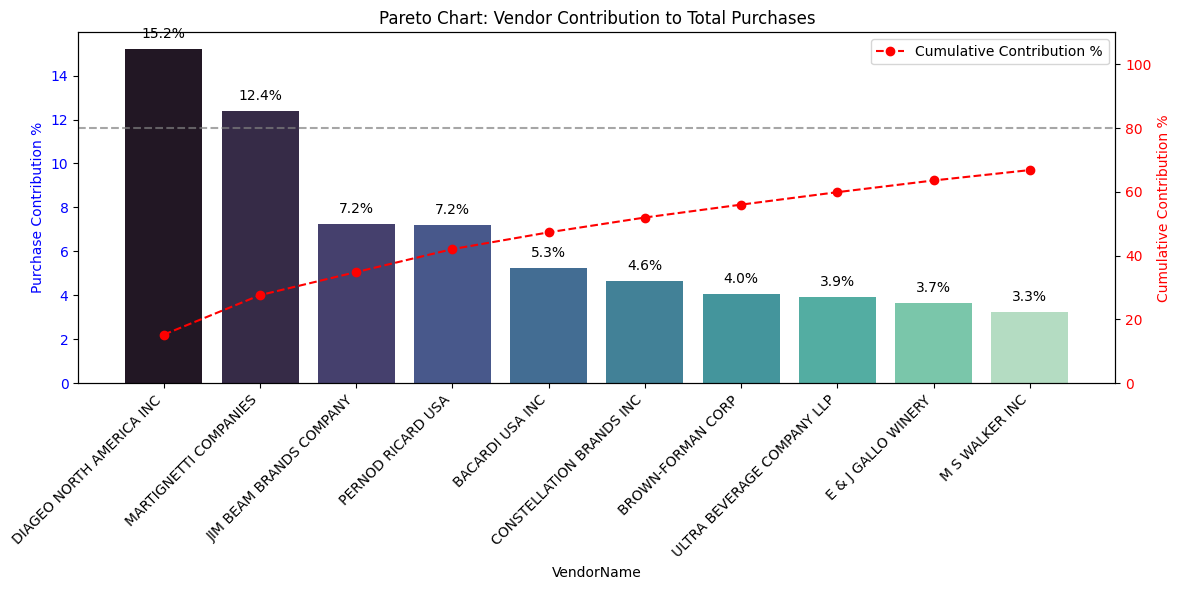

In [66]:
# --- Step 1: Re-create the vendor_performance DataFrame from the original 'df' ---
# This ensures all your columns are numbers, not text.
vendor_performance = df.groupby('VendorName').agg(
    TotalPurchaseDollars=('TotalPurchaseDollars', 'sum'),
    GrossProfit=('GrossProfit', 'sum'),
    TotalSalesDollars=('TotalSalesDollars', 'sum')
).reset_index()

# --- Step 2: Calculate the Purchase Contribution ---
# This will now work because the columns are numeric.
vendor_performance['PurchaseContribution'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()

# --- Step 3: Sort and calculate the Cumulative Contribution ---
vendor_performance = vendor_performance.sort_values(by='PurchaseContribution', ascending=False)
vendor_performance['Cumulative_Contribution'] = vendor_performance['PurchaseContribution'].cumsum() * 100
top_vendors_pareto = vendor_performance.head(10) # Use a new name to avoid confusion

# --- Step 4: Create the Pareto Chart ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Purchase Contribution
sns.barplot(x=top_vendors_pareto['VendorName'], y=top_vendors_pareto['PurchaseContribution']*100, palette="mako", ax=ax1)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right") # Improved label rotation

# Add text labels on top of the bars
for i, value in enumerate(top_vendors_pareto['PurchaseContribution']*100):
    ax1.text(i, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10, color='black')

# Line plot for Cumulative Contribution
ax2 = ax1.twinx() # Create a second y-axis
ax2.plot(top_vendors_pareto['VendorName'], top_vendors_pareto['Cumulative_Contribution'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 110) # Set y-axis limit for the line plot

# Add a line at the 80% mark
ax2.axhline(y=80, color='gray', linestyle='dashed', alpha=0.7)

# Final chart titles and layout
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

**How much of total procurement is dependent on the top vendors?**